## Pib Lib Demo
Reference Notebook for functionality of pib lib
> To run this notebook, pib_lib must be installed to your Python environment

In [1]:
from pib_lib import particle_in_a_box as pib # Main library providing the 'Particle_in_a_Box_State' class
from pib_lib import update_plot as up        # library to provide basic visualization functionality based on matplotlib
from pib_lib import Special_States as spst   # Collection of special preset states (Gaussian wave packets)
import numpy as np
from matplotlib import pyplot as plt

Creation of generic particle-in-a-box state with the following parameters:
- `L`: Width of the interval in natural units
- `m`: Mass of the particle in natural units
- `states`: Array containing the quantum numbers of the energy eigenstates we want to superimpose. To understand to which states the respective quantum numbers refere, please see [Self-Adjoint Hamiltonian](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.2).
- `amps`: Amplitudes of the latter states. If the resulting state is not normalized to one, the state will be normalized automatically; hence the entries of the list are to be considered relative amplitudes.
- `boundary_condition`: one of `symmetric`, `anti_symmetric`, `dirichlet`, `neumann`, `dirichlet_neumann`, `symmetric_nummeric`, `anti_symmetric_nummeric`
please see sections [2.2](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.2) and [2.3](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.3) of the [bachelor thesis](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf) this library was designed for to get a better understanding of the boundary conditions.
- `gamma`: Parameter charakterizing the boundary condition of a self-adjoint Hamilton operator depending on choice of `boudary_condition` 
  - for `symmetric` and `symmetric_nummeric` : `gamma` $= \gamma_+ = \gamma_-$ (see [section 2.3.1](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.3))
  - for `anti_symmetric` and `anti_symmeric_nummeric`: `gamma`$= \gamma_+ = -\gamma_-$ (see [section 2.3.2](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.3))

In [2]:
L = np.pi
m = 1
states = [1,2,3]
amps = [1,1j,1+1j]
boudary_condition = "anti_symmetric"
gamma = 10

state = pib.Particle_in_Box_State(boudary_condition, L, m, states, amps, gamma)

After creation, most properties of the state can be altered as follows:

In [3]:
state.L = 2*np.pi                   # change length of the interval
state.m = 2                         # change mass of the particle
state.case = "dirichlet_neumann"    # change the boundary condition

state.add_state([4,5], [2, 3])      # add states with quantum numbers 4 and 5 and relative amplitudes of 2 and 3 respectively
state.remove_state([1,4])           # remove the previously added states with quantum numbers 1 and 4

We can then retrieve position and momentum space projections of the state as python functions:

In [5]:
pos_space_proj = state.x_space_wavefunction
momentum_space_proj = state.k_space_wavefunction

The latter functions take as arguments a continous value of position (that is, of momentum respectively) and the time:

In [6]:
x_amp = pos_space_proj(0.5, 1) # evaluate the position space wave function at x = 0.5 and t = 1

c:\Users\valen\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


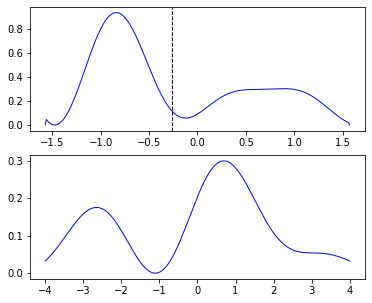

In [20]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(nrows=2, ncols=1)
pos_ax = fig.add_subplot(gs[0,0])
momentum_ax = fig.add_subplot(gs[1,0])

position_plot = up.position_space_plot(state, fig, pos_ax)
momentum_plot = up.momentum_space_plot(state, fig, momentum_ax)
plots = up.Update_Plot_Collection(fig, position_plot, momentum_plot)

plots.set_t(1)
plots.plot()